### IMPORTS

In [1]:
# load, preprocess, scale, baseline
from wrangle import final_dataset

# manipulate data
import pandas as pd
import numpy as np

# visualize data
import matplotlib.pyplot as plt
from cluster_plots import (ncomponents_optimal, scatter_component_means,
                           nclusters_optimal, scatter_cluster_centers)
from dimensionality_reduction_plots import  (proportion_variance_explained,
                                            scree_plot,
                                            variance_explained,
                                            pca_plot)
from nn_plot import (learn_curve_display,
                    val_curve_display)

# put it all together
from models import put_it_all_together

np.random.seed(123)

$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Load, Clean, Preprocess, Scale, Baseline: Cardiovascular Disease}
$$

In [2]:
%%time
X_train_scaled_cd, X_test_scaled_cd, y_train_cd, y_test_cd = final_dataset(dataset='cvd')

CVD Loading and Cleaning...
CVD Loaded and Cleaned...

CVD Splitting...
CVD Split...

CVD Scaling...
CVD Scaled...

Baseline Accuracy Score: 0.51%

CPU times: user 112 ms, sys: 24.1 ms, total: 136 ms
Wall time: 136 ms


$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Optimal Clusters}\\~\\
\textbf{View Optimal Clusters Scatter Plot}
$$

In [3]:
# nclusters_optimal(X_train=X_train_scaled_cd, y_train=y_train_cd, dset='cvd')
# scatter_cluster_centers(X_train=X_train_scaled_cd, k=3, dset='cvd', xlabel='Height', ylabel='Weight')

$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Optimal Components}\\~\\
\textbf{View Optimal Components Scatter Plot}
$$

In [4]:
#ncomponents_optimal(X_train_scaled_cd, y_train_cd, 'cvd')
#scatter_component_means(X_train_scaled_cd, 5, 'cvd', 'Height', 'Weight')

$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Perform All Steps, Run All Models}
$$

In [5]:
%%time
# Run CVD Model
results_cv = put_it_all_together(X_train=X_train_scaled_cd,
                                y_train=y_train_cd,
                                X_test=X_test_scaled_cd,
                                y_test=y_test_cd,
                                dset='cvd')


Running All Steps
Step: 1
Fitting and Predicting Expectation Maximization
Fitting and Predicting Gaussian Mixture


Done with Gaussian Mixture
Done with Expectation Maximization

Fitting and Predicting Clustering
Fitting and Predicting KMeans
Done with KMeans
Done with Clustering
Step: 1 Complete

Step: 2
Fitting PCA
Fitting General PCA
Done with General PCA
Done with PCA

Fitting ICA
Fitting and Transforming FastICA
Done with FastICA
Done with ICA

Fitting and Transforming Randomized Projections
Fitting and Transforing with Sparse Random Projection
Done with Sparse Random Projection
Done with Randomized Projections

Fitting and Transforming Manifold Learning
Fitting and Transforming with Locally Linear Embedding: Heissan Mapping
Done with Locally Linear Embedding: Heissan Mapping
Done with Manifold Learning
Step: 2 Complete

Step: 3
Fitting and Predicting Expectation Maximization
Fitting and Predicting Gaussian Mixture
Done with Gaussian Mixture
Done with Expectation Maximization

Fitting and Predicting Clustering
Fitting and Predicting KMeans
Done with KMeans
Done with Clustering
Fitting and Predi

/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

GM NN Complete
Fitting and Predicting Clustering NN


/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leonardo_leads/miniconda3/envs/mluldr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Clustering NN Complete
Step: 5 Complete

Completed All Steps
CPU times: user 6min 59s, sys: 4min 35s, total: 11min 35s
Wall time: 1h 43min 37s


In [6]:
step1_cv = results_cv['cvd']['step1']
step2_cv = results_cv['cvd']['step2']
step3_cv = results_cv['cvd']['step3']
step4_cv = results_cv['cvd']['step4']
step5_cv = results_cv['cvd']['step5']

pca_best = step4_cv['pca']
ica_best = step4_cv['ica']
srp_best = step4_cv['sparseRP']
hlle_best = step4_cv['manifold']

pca_train = results_cv['cvd']['step2']['pca'][1]
ica_train = results_cv['cvd']['step2']['ica'][1]
sparseRP_train = results_cv['cvd']['step2']['sparseRP'][1]
manifold_train = results_cv['cvd']['step2']['manifold'][1]

cd_params = {'param1_name': 'beta_1',
                'param1_range': [0.25, 0.50, 0.75, 0.90],
                'param2_name': 'beta_2',
                'param2_range': [0.22, 0.44, 0.66, 0.88],
                'sizes': [0.7, 0.75, 0.80, 0.90]}

$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Step 4, Learning and Validation Curves}
$$

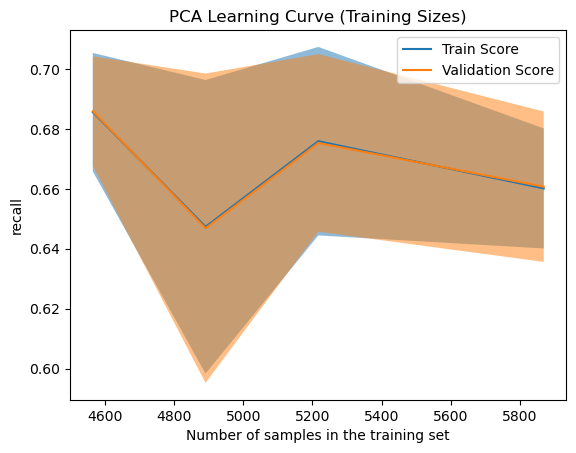

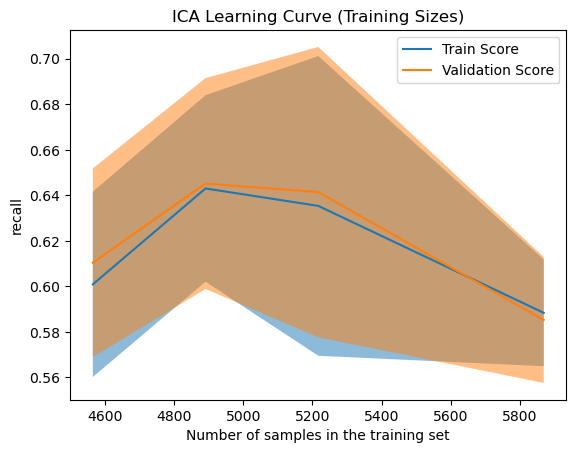

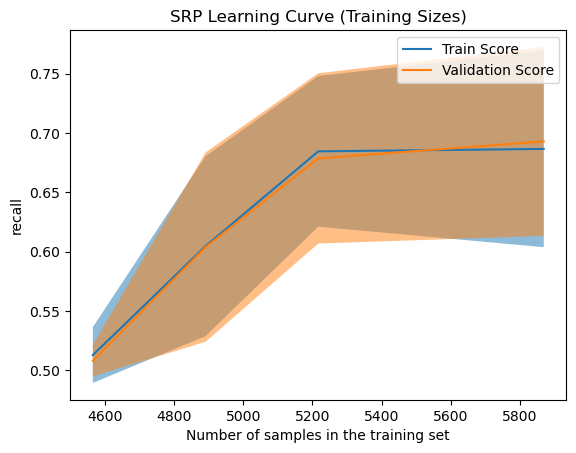

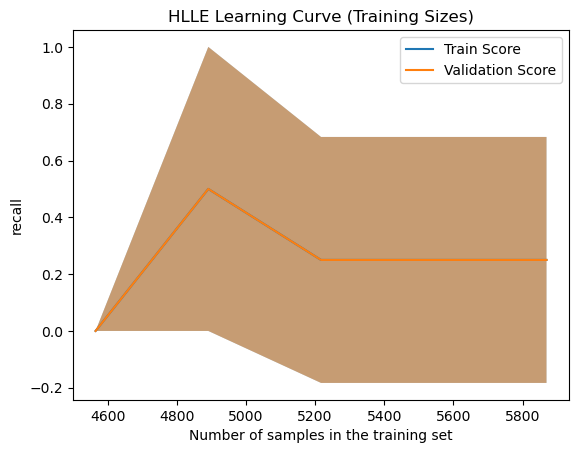

In [7]:
## learning curves
# pca
fit_times_pca, score_times_pca = learn_curve_display(pca_train, y_train_cd, 'cvd', cd_params['sizes'], 'pca')

# ica
fit_times_ica, score_times_ica = learn_curve_display(ica_train, y_train_cd, 'cvd', cd_params['sizes'], 'ica')

# srp
fit_times_srp, score_times_srp = learn_curve_display(sparseRP_train, y_train_cd, 'cvd', cd_params['sizes'], 'srp')

# hlle
fit_times_hlle, score_times_hlle = learn_curve_display(manifold_train, y_train_cd, 'cvd', cd_params['sizes'], 'hlle')

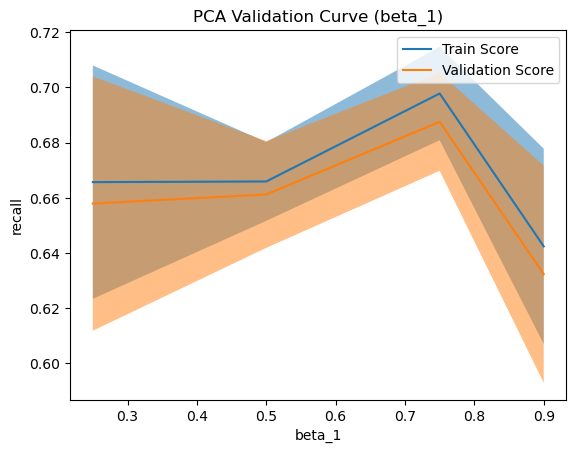

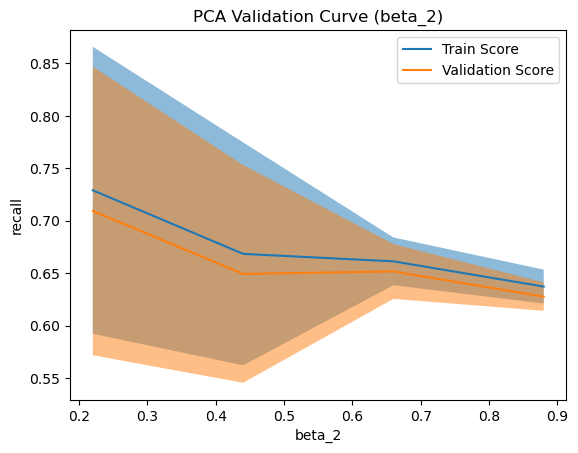

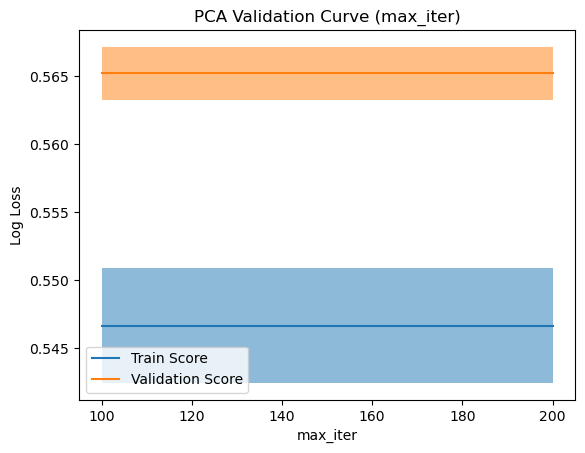

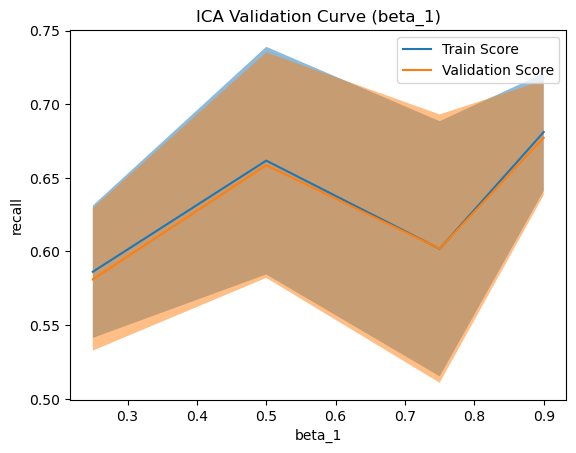

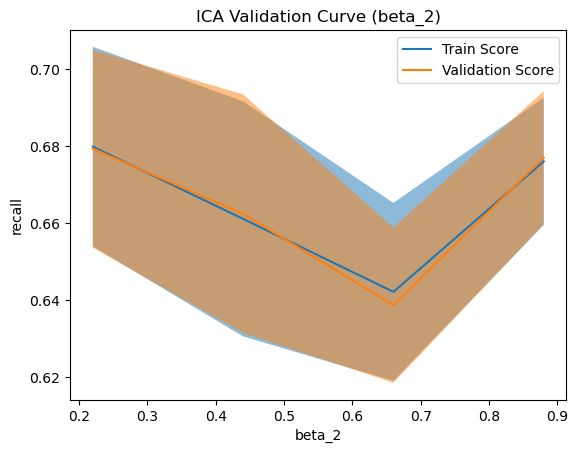

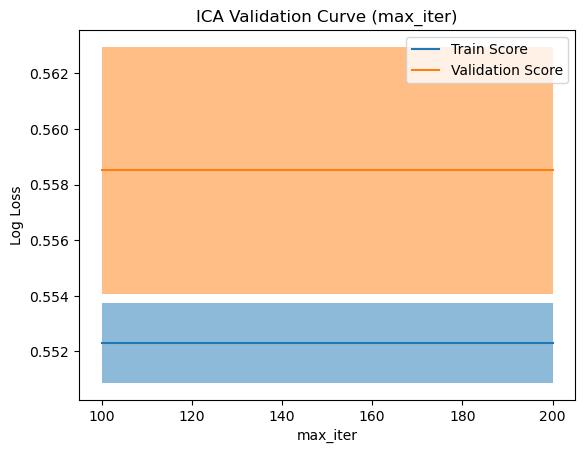

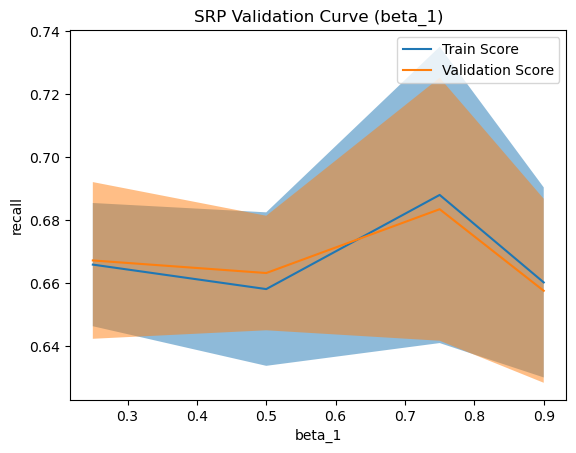

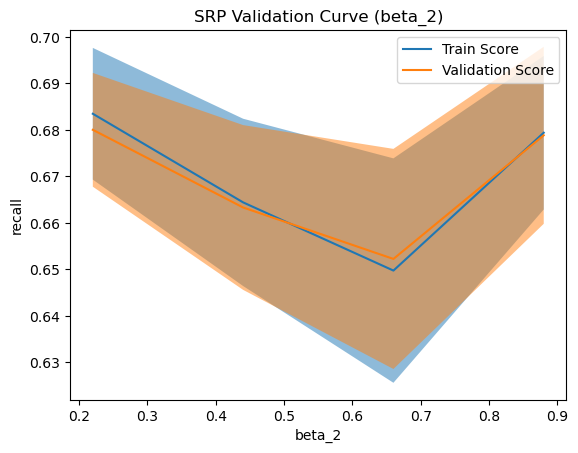

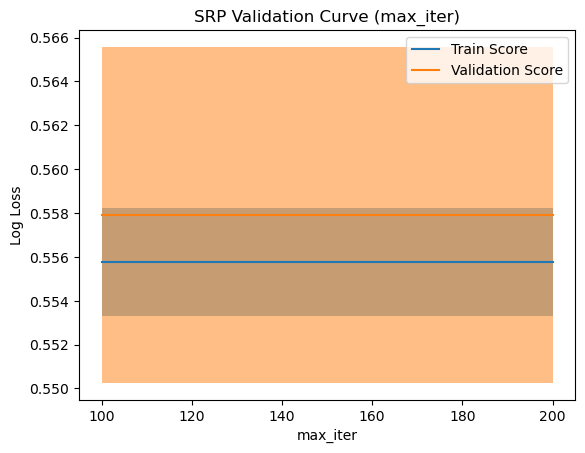

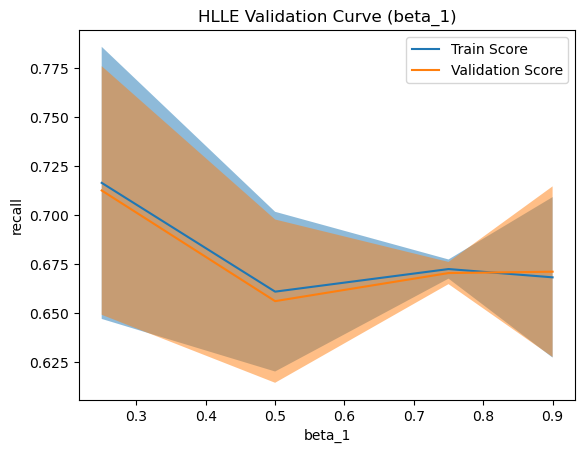

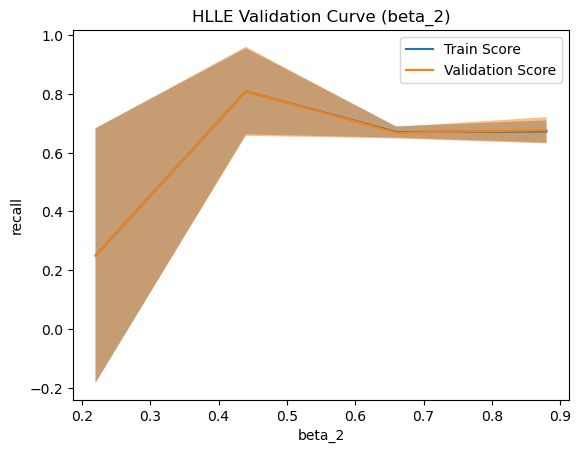

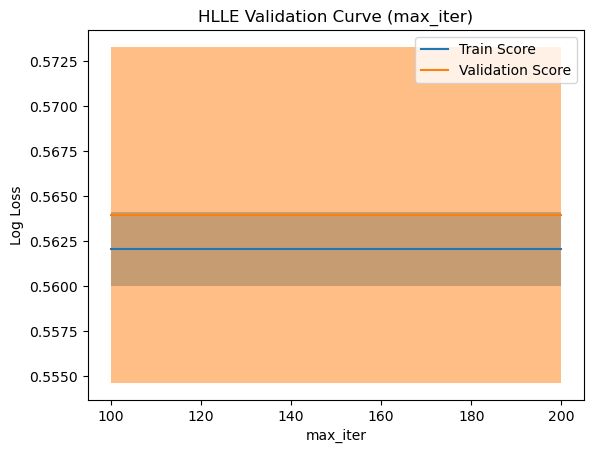

In [8]:
## validation curves
# pca
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='pca',error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='pca',error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    None, None, model_name='pca', error=True)

# ica
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd',
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='ica',error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='ica', error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd',
                    None, None, model_name='ica', error=True)

# srp
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='srp', error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='srp', error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd',
                    None, None, model_name='srp', error=True)

# hlle
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='hlle', error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='hlle', error=False)
val_curve_display(X_train_scaled_cd, y_train_cd, 'cvd',
                    None, None, model_name='hlle', error=True)


$$
\textbf{Cardiovascular Disease}\\~\\
\textbf{Step 5, Learning and Validation Curves}
$$

In [9]:
gm_best = step5_cv['gm']
cl_best = step5_cv['kmeans']

X_train_gm = step1_cv['gm'][1]
X_train_cl = step1_cv['kmeans'][1]

cd_params = {'param1_name': 'beta_1',
                'param1_range': [0.25, 0.50, 0.75, 0.90],
                'param2_name': 'beta_2',
                'param2_range': [0.22, 0.44, 0.66, 0.88],
                'sizes': [0.7, 0.75, 0.80, 0.90]}

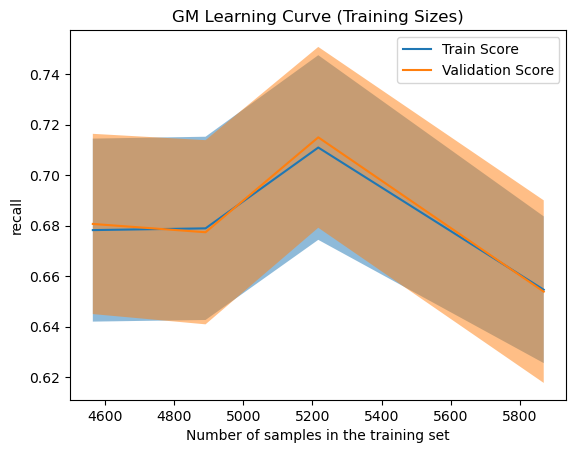

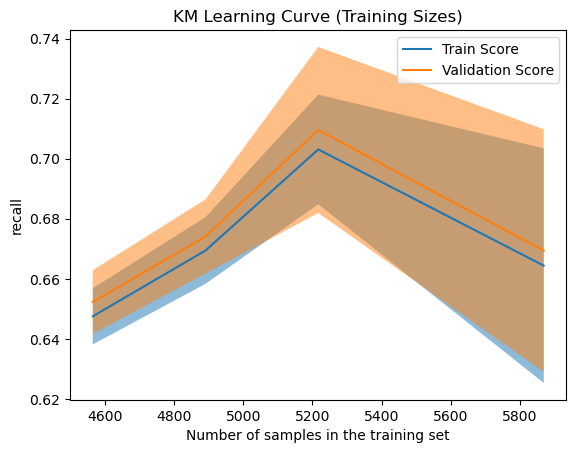

In [10]:
## learning curves
# gm
fit_times_gm, score_times_gm = learn_curve_display(X_train_gm, y_train_cd, 'cvd', cd_params['sizes'], 'gm')

# cl
fit_times_cl, score_times_cl = learn_curve_display(X_train_cl, y_train_cd, 'cvd', cd_params['sizes'], 'km')

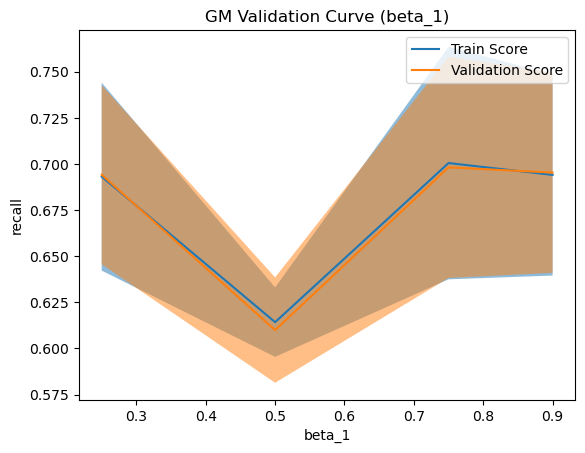

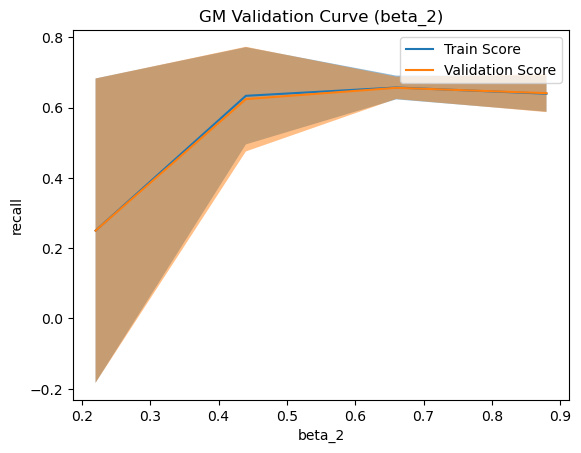

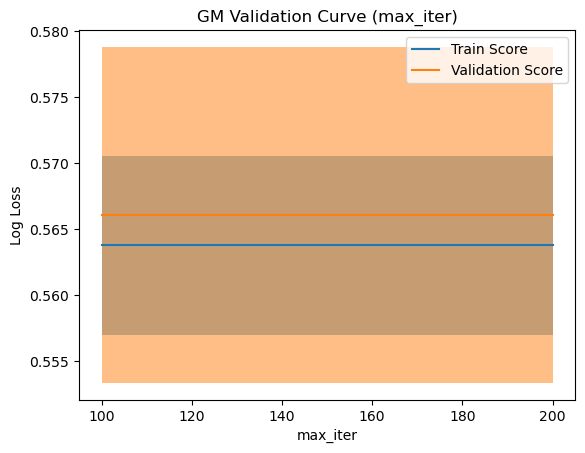

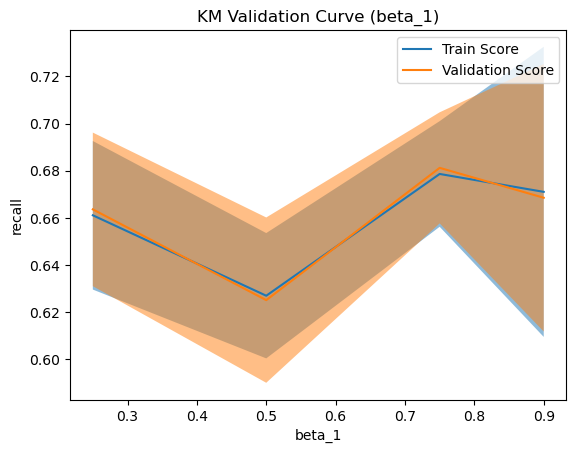

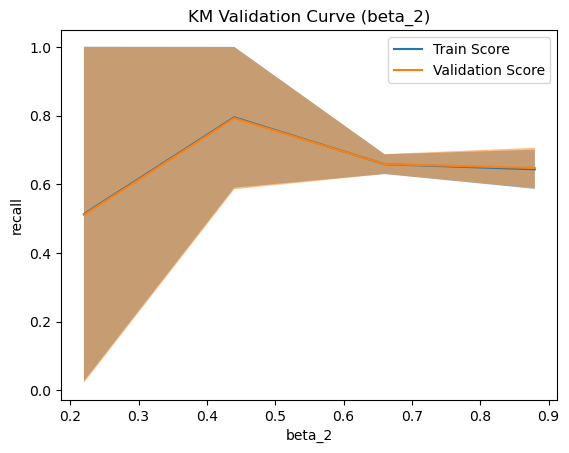

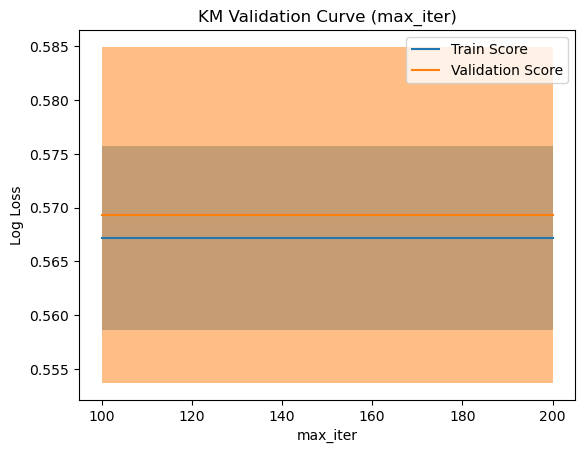

In [11]:
## validation curves
# gm
val_curve_display(X_train_gm, y_train_cd, 'cvd', 
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='gm', error=False)
val_curve_display(X_train_gm, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='gm', error=False)
val_curve_display(X_train_gm, y_train_cd, 'cvd', 
                    None, None, model_name='gm', error=True)

# cl
val_curve_display(X_train_cl, y_train_cd, 'cvd',
                    cd_params['param1_name'], cd_params['param1_range'],
                    model_name='km', error=False)
val_curve_display(X_train_cl, y_train_cd, 'cvd', 
                    cd_params['param2_name'], cd_params['param2_range'],
                    model_name='km', error=False)
val_curve_display(X_train_cl, y_train_cd, 'cvd',
                    None, None, model_name='km', error=True)

$$
\textbf{Nutrition Facts}\\~\\
\textbf{Load, Clean, Preprocess, Scale, Baseline: Nutrition Facts}
$$

In [12]:
%%time
X_train_scaled_nf, X_test_scaled_nf, y_train_nf, y_test_nf = final_dataset(dataset='nf')

NF Loading and Cleaning...
NF Loaded and Cleaned...

NF Splitting...
NF Split...

NF Scaling...
NF Scaled...

Baseline Accuracy Score: 0.44%

CPU times: user 16.1 s, sys: 19.4 ms, total: 16.1 s
Wall time: 16.1 s


$$
\textbf{Nutrition Facts}\\~\\
\textbf{Optimal Clusters}\\~\\
\textbf{View Optimal Clusters Scatter Plot}
$$

In [13]:
# nclusters_optimal(X_train=X_train_scaled_nf, y_train=y_train_nf, dset='nf')
# scatter_cluster_centers(X_train=X_train_scaled_nf, k=4, dset='nf', xlabel='Protein', ylabel='Carbohydrate')

$$
\textbf{Nutrition Facts}\\~\\
\textbf{Optimal Components}\\~\\
\textbf{View Optimal Components Scatter Plot}
$$

In [14]:
#ncomponents_optimal(X_train_scaled_nf, y_train_nf, 'nf')
#scatter_component_means(X_train_scaled_nf, 5, 'nf', 'Protein', 'Carbohydrates')

$$
\textbf{Nutrition Facts}\\~\\
\textbf{Perform All Steps, Run All Models}
$$

In [15]:
%%time
# Run NF Model
results_nf = put_it_all_together(X_train=X_train_scaled_nf,
                                y_train=y_train_nf,
                                X_test=X_test_scaled_nf, 
                                y_test=y_test_nf,
                                dset='nf')


Running All Steps
Step: 1
Fitting and Predicting Expectation Maximization
Fitting and Predicting Gaussian Mixture
Done with Gaussian Mixture
Done with Expectation Maximization

Fitting and Predicting Clustering
Fitting and Predicting KMeans
Done with KMeans
Done with Clustering
Step: 1 Complete

Step: 2
Fitting PCA
Fitting General PCA
Done with General PCA
Done with PCA

Fitting ICA
Fitting and Transforming FastICA
Done with FastICA
Done with ICA

Fitting and Transforming Randomized Projections
Fitting and Transforing with Sparse Random Projection
Done with Sparse Random Projection
Done with Randomized Projections

Fitting and Transforming Manifold Learning
Fitting and Transforming with Locally Linear Embedding: Heissan Mapping
Done with Locally Linear Embedding: Heissan Mapping
Done with Manifold Learning
Step: 2 Complete

Step: 3
Fitting and Predicting Expectation Maximization
Fitting and Predicting Gaussian Mixture
Done with Gaussian Mixture
Done with Expectation Maximization

Fitt

In [16]:
step1_nf = results_nf['nf']['step1']
step2_nf = results_nf['nf']['step2']
step3_nf = results_nf['nf']['step3']